# HAM10000 Dataset 
## Initial Exploratory Data Analysis 

The HAM10000 dataset is a large collection of multi-source dermatoscopic images of common pigmented skin lesions from different populations acquired and stored by different modalities.

By: Philipp Tschandl1, Cliff Rosendahl2 & Harald Kittler1

### Initial file loading and exploration

In [1]:
# Declaring necessary libraries:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import streamlit as st
import seaborn as sns

In [2]:
# Opening the csv file:

raw_data_df = pd.read_csv('HAM10000_metadata.csv')
raw_data_df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


**Glossary of concepts**
- lession_id: Unique identifier designed in the database for each record
- image_id: unique identifier of every image in the dataset
- dx: Type of skin lession (Description provided bellow)
- dx_type: The method used to assess the skin lession (Histopathology or confocal)
- age: Age of the patient
- sex: Biological sex of the patient
- localization: Location of the skin lession on the body of the patient

### Data cleaning of the dataframe

Normalizing data in several columns for analysis.

In [3]:
# Lowercase text in relevant columns:
columns_to_lower = ['dx', 'dx_type', 'sex', 'localization']

for column in columns_to_lower:
    raw_data_df[column] = raw_data_df[column].apply(lambda x: x.lower())

Locating and removing duplicates (if needed).

In [15]:
# Locating nulls:
lesion_nulls = raw_data_df['lesion_id'].isnull().sum().sum()
image_nulls = raw_data_df['image_id'].isnull().sum().sum()
dx_nulls = raw_data_df['dx'].isnull().sum().sum()
dx_type_nulls = raw_data_df['dx_type'].isnull().sum().sum()
age_nulls = raw_data_df['age'].isnull().sum().sum()
sex_nulls = raw_data_df['sex'].isnull().sum().sum()
localization_nulls = raw_data_df['localization'].isnull().sum().sum()

# Creating list for loop:
nulls_list = [
    lesion_nulls,
    image_nulls,
    dx_nulls,
    dx_type_nulls,
    age_nulls,
    sex_nulls,
    localization_nulls
]

# Looping through each column to see if there are any relevant nulls:
for n, column in enumerate(nulls_list):
    if column != 0:
        print(f'nulls in column {n}: {column}')

nulls in column 4: 57


For the sake of this analysis we will remove null age records so that we have a representative sample of the data when performing statistical analysis.

In [5]:
no_nulls_data = raw_data_df.dropna().copy()
no_nulls_data

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


### Initial Exploratory Data Analysis

Basic statistical descriptive analysis to get some insights about the distribution of the data.

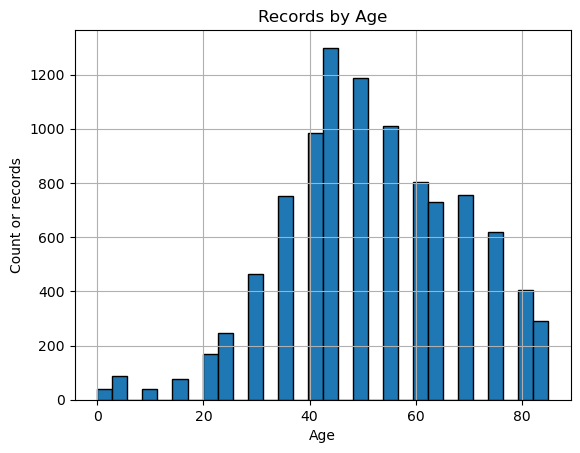

In [6]:
age_data = no_nulls_data['age']

# Plotting the histogram
plt.hist(age_data, bins=30, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Records by Age')
plt.xlabel('Age')
plt.ylabel('Count or records')
plt.grid(True)
plt.show()

**Interesting insight:**
- Assumption 1: The distribution looks normal with a left skew
- Assumption 2: Younger age groups and newborns seem to be less represented in this dataset. If so, Why? 

This derived in different questions that we might need to discuss with subject experts such as dermatologists and cosmethologists. 
- Is there a correlation between skin conditions and age or not? 
- Are newborns less prone to getting skin cancer related conditions or not?
- Can we come up with a statistically significant assessment of these inquiries?

Paper on diseases affecting skin by age groups: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6064677/

In [7]:
# Get the bin edges to display age groups:
hist, bin_edges = np.histogram(age_data, bins=30)

# Print the age ranges represented by each bin
for i in range(len(bin_edges) - 1):
    print(f"Bin {i+1}: {bin_edges[i]} - {bin_edges[i+1]}")

Bin 1: 0.0 - 2.8333333333333335
Bin 2: 2.8333333333333335 - 5.666666666666667
Bin 3: 5.666666666666667 - 8.5
Bin 4: 8.5 - 11.333333333333334
Bin 5: 11.333333333333334 - 14.166666666666668
Bin 6: 14.166666666666668 - 17.0
Bin 7: 17.0 - 19.833333333333336
Bin 8: 19.833333333333336 - 22.666666666666668
Bin 9: 22.666666666666668 - 25.5
Bin 10: 25.5 - 28.333333333333336
Bin 11: 28.333333333333336 - 31.166666666666668
Bin 12: 31.166666666666668 - 34.0
Bin 13: 34.0 - 36.833333333333336
Bin 14: 36.833333333333336 - 39.66666666666667
Bin 15: 39.66666666666667 - 42.5
Bin 16: 42.5 - 45.333333333333336
Bin 17: 45.333333333333336 - 48.16666666666667
Bin 18: 48.16666666666667 - 51.0
Bin 19: 51.0 - 53.833333333333336
Bin 20: 53.833333333333336 - 56.66666666666667
Bin 21: 56.66666666666667 - 59.5
Bin 22: 59.5 - 62.333333333333336
Bin 23: 62.333333333333336 - 65.16666666666667
Bin 24: 65.16666666666667 - 68.0
Bin 25: 68.0 - 70.83333333333334
Bin 26: 70.83333333333334 - 73.66666666666667
Bin 27: 73.6666

<Axes: xlabel='dx', ylabel='age'>

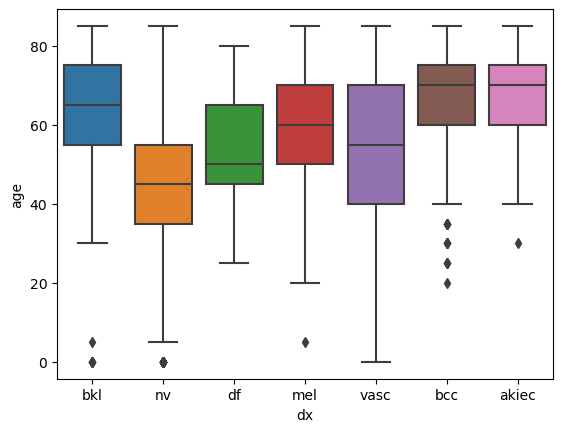

In [8]:
sns.boxplot(x='dx', y='age', data=no_nulls_data)

In [9]:
no_nulls_data['age'].describe()

count    9958.000000
mean       51.863828
std        16.968614
min         0.000000
25%        40.000000
50%        50.000000
75%        65.000000
max        85.000000
Name: age, dtype: float64

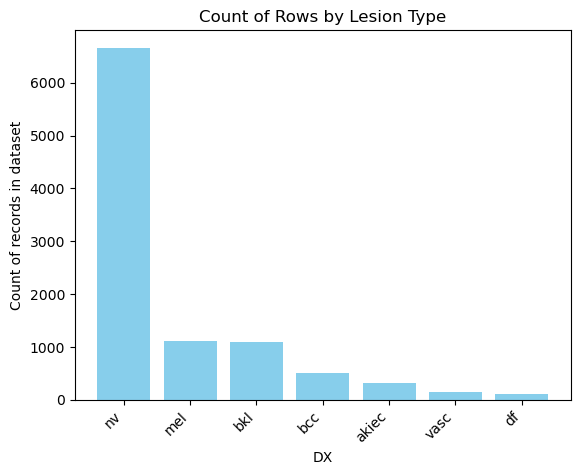

In [10]:
dx_counts = no_nulls_data['dx'].value_counts()

# Plotting the bar chart
plt.bar(dx_counts.index, dx_counts.values, color='skyblue')
plt.title('Count of Rows by Lesion Type')
plt.xlabel('DX')
plt.ylabel('Count of records in dataset')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

Melanocytic nevi (nv) appear to be the most prevalent type of skin lesion among this dataset. 
Melanocytic nevi are benign neoplasms of melanocytes and appear in a myriad of variants, this dataset included all types in the series. The variants may differ significantly from a dermatoscopic point of view. In contrast to melanoma they are usually symmetric with regard to the distribution of color and structure.

### DX glossary: Types of skin lessions

- akiec: Actinic Keratoses (Solar Keratoses) and Intraepithelial Carcinoma (Bowen’s disease)
- bcc: Basal cell carcinoma is a common variant of epithelial skin cancer
- bkl: "Benign keratosis" is a generic class that includes seborrheic keratoses ("senile wart"), solar lentigo, and lichen-planus like keratoses (LPLK)
- df: Dermatofibroma is a benign skin lesion
- nv: Melanocytic nevi are benign neoplasms of melanocytes
- mel: Melanoma is a malignant neoplasm
- vasc: Vascular skin lesions

## Other Distributions

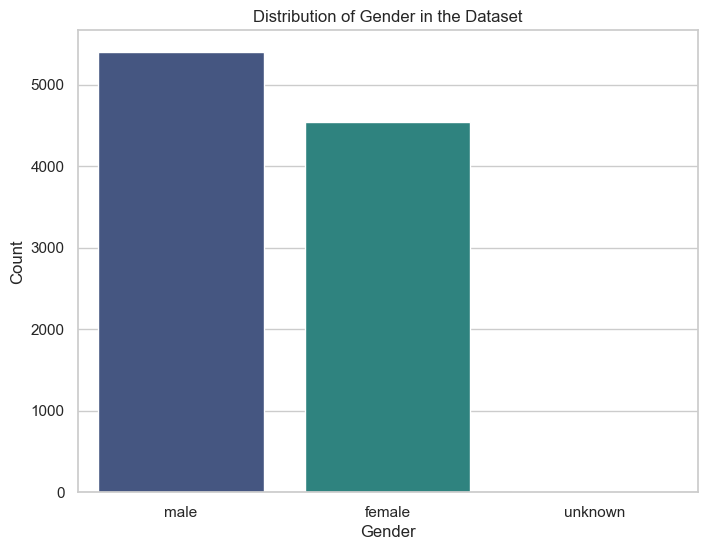

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Bar plot for gender distribution:
sns.countplot(x='sex', data=no_nulls_data, palette='viridis')

# Labels and title:
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender in the Dataset')

plt.show()

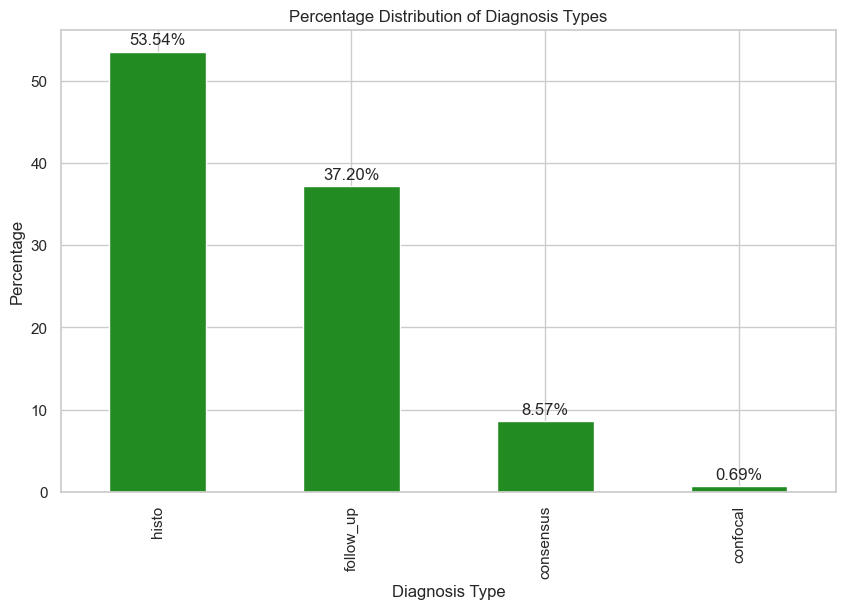

In [12]:
# Diagnosis types by percentage:

dx_type_percentage = no_nulls_data['dx_type'].value_counts(normalize=True) * 100

# Plotting the bar chart
plt.figure(figsize=(10, 6))
dx_type_percentage.plot(kind='bar', color='forestgreen')

# Adding labels and title
plt.xlabel('Diagnosis Type')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Diagnosis Types')

# Display the percentage values on top of the bars
for index, value in enumerate(dx_type_percentage):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center', va='bottom')

# Show the plot
plt.show()

Percentage of presence per diagnosis type by count of records.

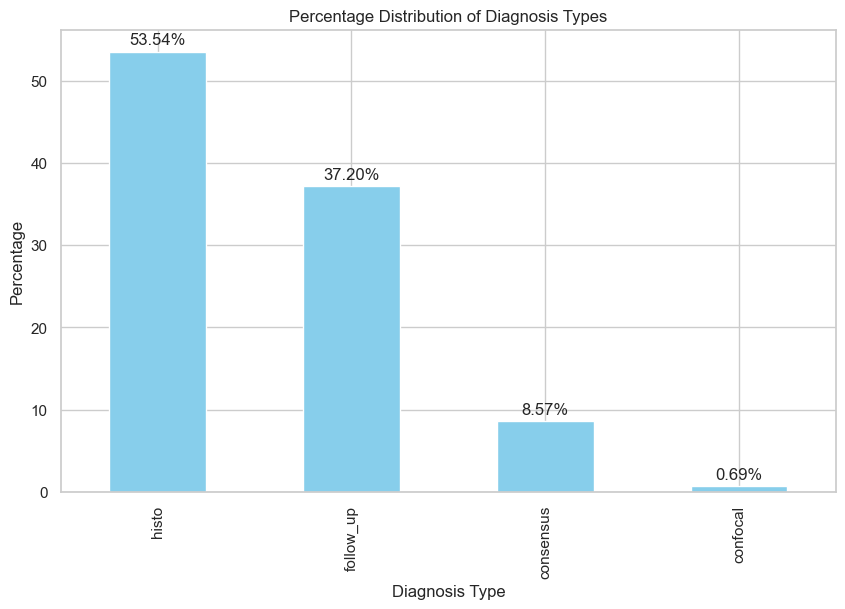

In [16]:


localization_percentage = no_nulls_data['dx_type'].value_counts(normalize=True) * 100

# Plotting the bar chart
plt.figure(figsize=(10, 6))
dx_type_percentage.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Diagnosis Type')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Diagnosis Types')

# Display the percentage values on top of the bars
for index, value in enumerate(dx_type_percentage):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center', va='bottom')

# Show the plot
plt.show()

Count of records by body segment where the lesion is present.

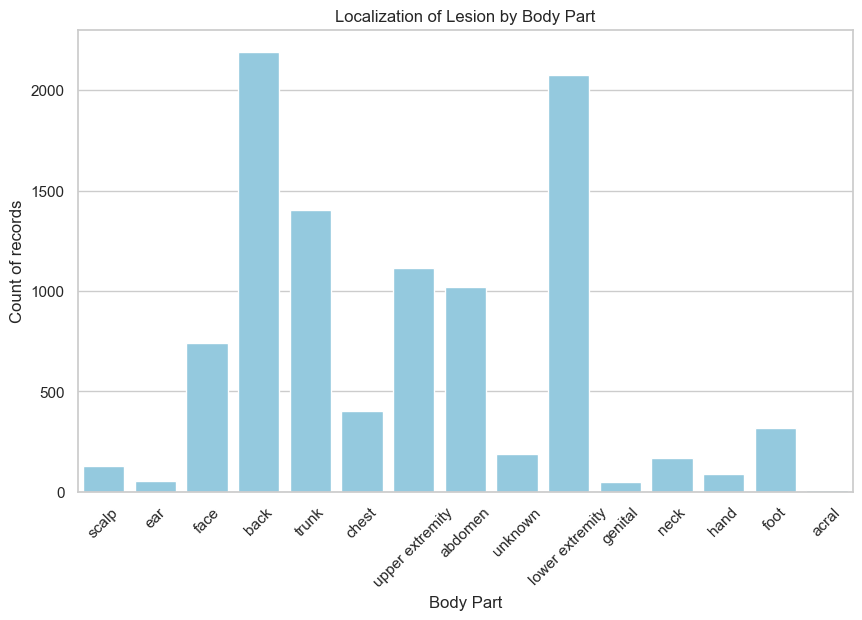

In [13]:
# Localization of lesion by count:

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Bar plot for localization distribution:
chart = sns.countplot(x='localization', data=no_nulls_data, color='skyblue')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

# Labels and title:
plt.xlabel('Body Part')
plt.ylabel('Count of records')
plt.title('Localization of Lesion by Body Part')

plt.show()

In [33]:
from ydata_profiling import ProfileReport

profile = ProfileReport(no_nulls_data, title="HAM10000 Profiling Report", explorative=True)

# Save the report to an HTML file
profile.to_file("HAM10000_profiling_report.html")

# Display the report in Jupyter Notebook
profile.to_notebook_iframe()

/Users/carlosvarela/anaconda3/envs/final_project/lib/python3.11/site-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]